Epoch 1/10
22/22 [==============================] - 1s 17ms/step - loss: nan - val_loss: nan
Epoch 2/10
22/22 [==============================] - 0s 12ms/step - loss: nan - val_loss: nan
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 6/10
22/22 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 7/10
22/22 [==============================] - 0s 12ms/step - loss: nan - val_loss: nan
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 9/10
22/22 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 10/10
22/22 [==============================] - 0s 2ms/step


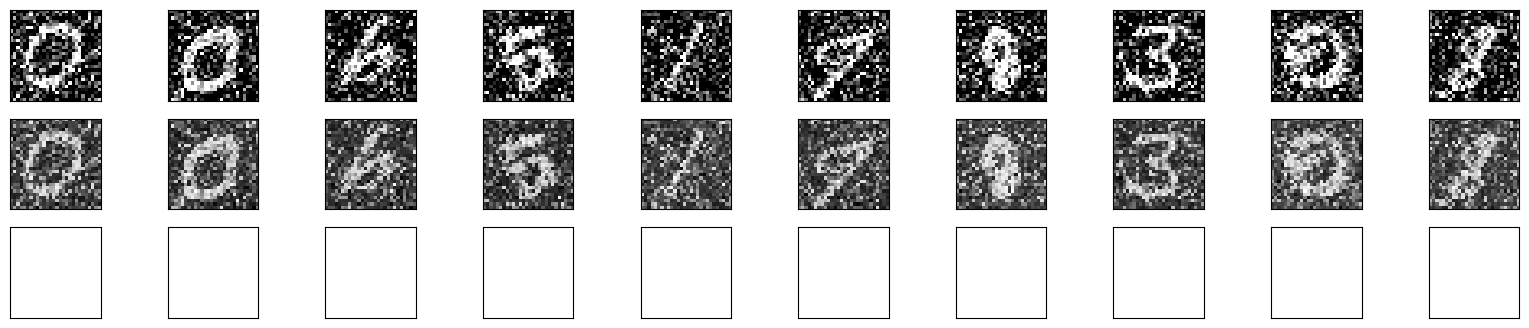

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Load the MNIST dataset
mnist_data = pd.read_csv('/content/mnist_784_csv.csv')  # Replace with the actual path

# Extract features (pixels) and labels
X = mnist_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y = mnist_data.iloc[:, 0].values

# Add random noise to the images
noise_factor = 0.5
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# Clip the values to be within the range [0, 1]
X_noisy = np.clip(X_noisy, 0., 1.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Build an autoencoder for image denoising
input_dim = X_train.shape[1]
latent_dim = 32

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(latent_dim, activation='relu')
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Autoencoder (combining encoder and decoder)
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on noisy images
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to denoise test images
denoised_images = autoencoder.predict(X_test)

# Visualize original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test[i].reshape(28, 28) + np.random.normal(0, 0.1, (28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Epoch 1/10
61/61 [==============================] - 1s 12ms/step - loss: nan - val_loss: nan
Epoch 2/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 3/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 4/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 5/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 6/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 7/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 8/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 9/10
61/61 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 10/10
61/61 [==============================] - 0s 4ms/step


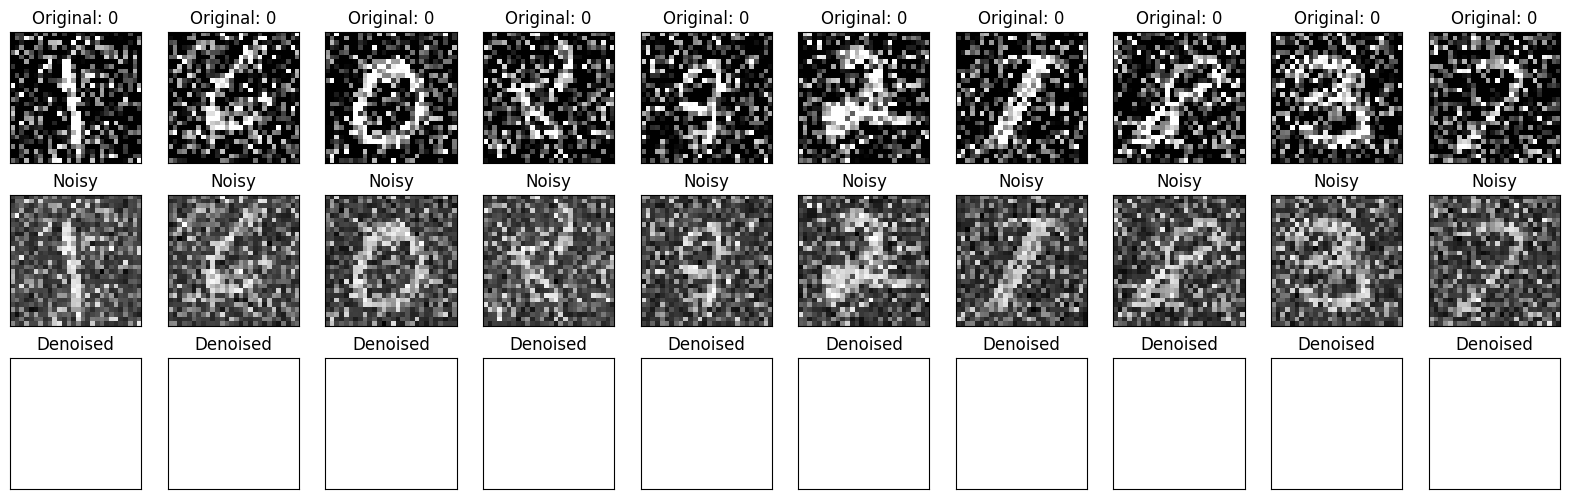

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist_data = pd.read_csv('/content/mnist_784_csv.csv')  # Replace with the actual path

# Extract features (pixels) and labels
X = mnist_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y = mnist_data.iloc[:, 0].values

# Add random noise to the images
noise_factor = 0.5
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# Clip the values to be within the range [0, 1]
X_noisy = np.clip(X_noisy, 0., 1.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Build an autoencoder for image denoising
input_dim = X_train.shape[1]
latent_dim = 32

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(latent_dim, activation='relu')
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Autoencoder (combining encoder and decoder)
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    encoder,
    decoder
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on noisy images
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

# Use the trained autoencoder to denoise test images
denoised_images = autoencoder.predict(X_test)

# Visualize original, noisy, and denoised images with labels
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Original: {y_test[i]}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test[i].reshape(28, 28) + np.random.normal(0, 0.1, (28, 28)))
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.title("Denoised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
